<a id="1"></a> <br>
# CS583A Project
* Humpback Whale Identification Challenge 

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras import layers

from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
os.listdir("./")

['.ipynb_checkpoints',
 'CNN - Humpback Whale Identification with Keras.ipynb',
 'CS583A Project.ipynb',
 'Humpback Whale Identification.ipynb',
 'ResNet50.h5',
 'sample_submission.csv',
 'simpleCNN.h5',
 'submission (1).csv',
 'submission.csv',
 'submission_DA.csv',
 'submission_PTRN50.csv',
 'submission_try.csv',
 'test',
 'train',
 'train.csv']

In [4]:
train_df = pd.read_csv("./train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


<a id="3"></a> <br>
## Preparing Images and Label Encoding output values

In [5]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("./"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    y = onehot_encoded
    return y, label_encoder

<a id="4"></a> <br>
### Import and Normalize the Data

In [6]:
X_train = prepareImages(train_df, train_df.shape[0], "train")
X_train /= 255.0

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [7]:
y_train, label_encoder = prepare_labels(train_df['Id'])

C:\Users\rajek\.conda\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Some samples

In [8]:
import seaborn as sns

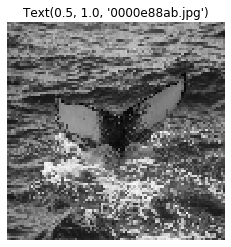

In [9]:
# Some examples(first one)
plt.imshow(X_train[0][:,:,0], cmap="gray")
plt.title(plt.title(train_df.iloc[0,0]))
plt.axis("off")
plt.show()

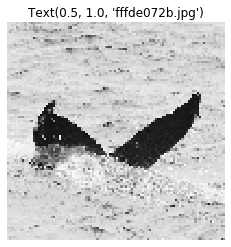

In [10]:
# Some examples(last one)
plt.imshow(X_train[25360][:,:,0], cmap="gray")
plt.title(plt.title(train_df.iloc[25360,0]))
plt.axis("off")
plt.show()

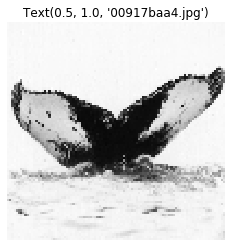

In [11]:
# Some examples(55th)
plt.imshow(X_train[55][:,:,0], cmap="gray")
plt.title(plt.title(train_df.iloc[55,0]))
plt.axis("off")
plt.show()

In [12]:
print(y_train.shape)
y_train 

(25361, 5005)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

<a id="6"></a> <br>
## Implementation

In [15]:
model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides = (1,1)))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3)))

model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 94, 94, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 64)       

In [16]:
history_model = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

Train on 25361 samples
Epoch 1/100
25361/25361 [==============================] - 20s 771us/sample - loss: 6.0598 - accuracy: 0.3796
Epoch 2/100
25361/25361 [==============================] - 15s 579us/sample - loss: 5.6952 - accuracy: 0.3811
Epoch 3/100
25361/25361 [==============================] - 15s 581us/sample - loss: 5.5407 - accuracy: 0.3811
Epoch 4/100
25361/25361 [==============================] - 15s 584us/sample - loss: 5.3576 - accuracy: 0.3811
Epoch 5/100
25361/25361 [==============================] - 15s 582us/sample - loss: 5.1733 - accuracy: 0.3811
Epoch 6/100
25361/25361 [==============================] - 15s 584us/sample - loss: 4.9284 - accuracy: 0.3811- loss: 4.9266 - accuracy: 0.38
Epoch 7/100
25361/25361 [==============================] - 15s 584us/sample - loss: 4.6096 - accuracy: 0.3817
Epoch 8/100
25361/25361 [==============================] - 15s 583us/sample - loss: 4.2112 - accuracy: 0.3844
Epoch 9/100
25361/25361 [==============================] - 15s 584

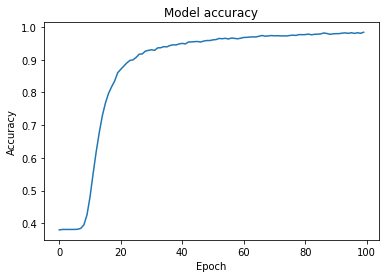

In [19]:
plt.plot(history_model.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [20]:
test = os.listdir("./test/")
print(len(test))

7960


In [21]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

test_df.shape

(7960, 2)

In [22]:
X_test = prepareImages(test_df, test_df.shape[0], "test")
X_test /= 255.0

Preparing images
Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg


In [23]:
predictions = model.predict(np.array(X_test), verbose=2)

7960/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

test_df.head(10)

,Image,Id
0,00028a005.jpg,new_whale w_b3ca4b7 w_08630fd w_f765256 w_80124ae
1,000dcf7d8.jpg,new_whale w_51fc1fc w_ae393cd w_bf960fa w_36bbd71
2,000e7c7df.jpg,new_whale w_454f511 w_27a6304 w_e5ab551 w_86726bc
3,0019c34f4.jpg,new_whale w_5d5c6a6 w_778e474 w_a8b34a0 w_0d7b050
4,001a4d292.jpg,new_whale w_92ac4b2 w_13c715a w_d1e0f06 w_2497490
5,00247bc36.jpg,new_whale w_dc662ea w_a94396f w_6caff0f w_1650208
6,0027089a4.jpg,w_7e2eb3d w_8eae2c3 new_whale w_5b227ec w_d215a68
7,002de4d94.jpg,new_whale w_ac33bfe w_633ead1 w_4a12050 w_af520bd
8,002f52f0c.jpg,new_whale w_17b0d3a w_780c931 w_cd4cb49 w_e740b27
9,002fd89d4.jpg,new_whale w_a61a47c w_bef54e9 w_2b069ba w_a9304b9


In [25]:
test_df.to_csv('submission.csv', index=False)

In [13]:
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPool2D

In [14]:
model_2 = Sequential()

model_2.add(Conv2D(16, kernel_size = (5,5), padding = 'Same', input_shape = (100,100,3)))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Conv2D(16, kernel_size = (5,5), padding = 'Same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPool2D(pool_size = (2,2)))

model_2.add(Conv2D(32, kernel_size = (3,3), padding = 'Same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, kernel_size = (3,3), padding = 'Same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))

model_2.add(Conv2D(64, kernel_size = (3,3), padding = 'Same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, kernel_size = (3,3), padding = 'Same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))

model_2.add(Flatten())
model_2.add(Dropout(0.5))
model_2.add(Dense(256))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dense(y_train.shape[1], activation = "softmax"))

In [15]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      6416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0

<a id="7"></a> <br>
### Setting the Optimizer
* Adam optimizer: Changes the learning rate during training

In [16]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [17]:
# optimizer = RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

<a id="8"></a> <br>
### Compile Model

In [20]:
model_2.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="9"></a>
### Data Augmentation

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

* ** Randomly rotate some training images by 10 degrees **
* ** Randomly zoom by 10% some training images **
* ** Randomly shift images horizontally by 10% of the width **
* ** Randomly shift images vertically by 10% of the height **
* ** Flip images horizontally **


In [22]:
train_datagen.fit(X_train)

<a id="10"></a> <br>
### Epochs and Batch Size

In [27]:
epochs = 100  # for better result increase the epochs
batch_size = 16

<a id="11"></a>
### Fit the Model

In [28]:
history = model_2.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                              epochs=100, verbose = 2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/100
1585/1585 - 137s - loss: 6.2164 - accuracy: 0.3794
Epoch 2/100
1585/1585 - 131s - loss: 5.5251 - accuracy: 0.3811
Epoch 3/100
1585/1585 - 132s - loss: 5.2598 - accuracy: 0.3811
Epoch 4/100
1585/1585 - 130s - loss: 5.0826 - accuracy: 0.3809
Epoch 5/100
1585/1585 - 132s - loss: 4.9048 - accuracy: 0.3813
Epoch 6/100
1585/1585 - 132s - loss: 4.7415 - accuracy: 0.3808
Epoch 7/100
1585/1585 - 132s - loss: 4.5845 - accuracy: 0.3810
Epoch 8/100
1585/1585 - 131s - loss: 4.4168 - accuracy: 0.3815
Epoch 9/100
1585/1585 - 133s - loss: 4.2907 - accuracy: 0.3807
Epoch 10/100
1585/1585 - 131s - loss: 4.1368 - accuracy: 0.3813
Epoch 11/100
1585/1585 - 138s - loss: 4.0299 - accuracy: 0.3810
Epoch 12/100
1585/1585 - 131s - loss: 3.9083 - accuracy: 0.3819
Epoch 13/100
1585/1585 - 133s - loss: 3.7960 - accuracy: 0.3827
Epoch 14/100
1585/1585 - 130s - loss: 3.6926 - accuracy: 0.3847
Epoch 15/100
1585/1585 - 133s - loss: 3.6013 - accuracy: 0.3839
Epoch 16/100
1585/1585 - 131s - loss: 3.5051 - ac

1585/1585 - 130s - loss: 2.0149 - accuracy: 0.5145
Epoch 43/100
1585/1585 - 133s - loss: 1.9744 - accuracy: 0.5216
Epoch 44/100
1585/1585 - 131s - loss: 1.9298 - accuracy: 0.5285
Epoch 45/100
1585/1585 - 132s - loss: 1.8973 - accuracy: 0.5327
Epoch 46/100
1585/1585 - 131s - loss: 1.8741 - accuracy: 0.5390
Epoch 47/100
1585/1585 - 133s - loss: 1.8461 - accuracy: 0.5454
Epoch 48/100
1585/1585 - 130s - loss: 1.8030 - accuracy: 0.5534
Epoch 49/100
1585/1585 - 132s - loss: 1.7783 - accuracy: 0.5569
Epoch 50/100
1585/1585 - 131s - loss: 1.7378 - accuracy: 0.5631
Epoch 51/100
1585/1585 - 133s - loss: 1.7214 - accuracy: 0.5709
Epoch 52/100
1585/1585 - 131s - loss: 1.6900 - accuracy: 0.5715
Epoch 53/100
1585/1585 - 133s - loss: 1.6424 - accuracy: 0.5815
Epoch 54/100
1585/1585 - 131s - loss: 1.6461 - accuracy: 0.5806
Epoch 55/100
1585/1585 - 132s - loss: 1.6130 - accuracy: 0.5830
Epoch 56/100
1585/1585 - 130s - loss: 1.5863 - accuracy: 0.5905
Epoch 57/100
1585/1585 - 132s - loss: 1.5548 - accura

1585/1585 - 132s - loss: 1.0857 - accuracy: 0.6969
Epoch 84/100
1585/1585 - 130s - loss: 1.0626 - accuracy: 0.7008
Epoch 85/100
1585/1585 - 132s - loss: 1.0671 - accuracy: 0.7058
Epoch 86/100
1585/1585 - 130s - loss: 1.0402 - accuracy: 0.7056
Epoch 87/100
1585/1585 - 132s - loss: 1.0322 - accuracy: 0.7136
Epoch 88/100
1585/1585 - 131s - loss: 1.0358 - accuracy: 0.7110
Epoch 89/100
1585/1585 - 132s - loss: 1.0037 - accuracy: 0.7188
Epoch 90/100
1585/1585 - 131s - loss: 0.9990 - accuracy: 0.7184
Epoch 91/100
1585/1585 - 133s - loss: 0.9862 - accuracy: 0.7207
Epoch 92/100
1585/1585 - 131s - loss: 0.9836 - accuracy: 0.7207
Epoch 93/100
1585/1585 - 132s - loss: 0.9942 - accuracy: 0.7198
Epoch 94/100
1585/1585 - 131s - loss: 0.9585 - accuracy: 0.7272
Epoch 95/100
1585/1585 - 133s - loss: 0.9455 - accuracy: 0.7306
Epoch 96/100
1585/1585 - 131s - loss: 0.9421 - accuracy: 0.7314
Epoch 97/100
1585/1585 - 133s - loss: 0.9200 - accuracy: 0.7370
Epoch 98/100
1585/1585 - 205s - loss: 0.9158 - accura

<a id="12"></a> <br>
### Evaluate the model

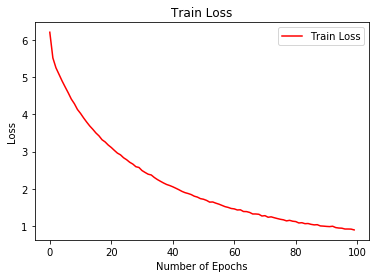

In [29]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

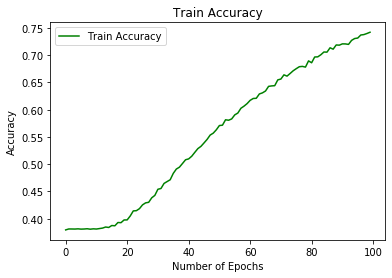

In [31]:
# Plot the accuracy curve for training
plt.plot(history.history['accuracy'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.7420845


In [35]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.8904521866838686


<a id="13"></a> <br>
## Predict Test Data

In [36]:
test = os.listdir("./test/")
print(len(test))

7960


In [37]:
col = ['Image']
test_data = pd.DataFrame(test, columns=col)
test_data['Id'] = ''

In [38]:
x_test = prepareImages(test_data, test_data.shape[0], "test")
x_test /= 255

Preparing images
Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg


In [42]:
predictions = model_2.predict(np.array(x_test), verbose=2)

7960/1 - 4s


In [43]:
for i, pred in enumerate(predictions):
    test_data.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [44]:
test_data.head(10)
test_data.to_csv('submission_model_2.csv', index=False)

In [45]:
model_2.save_weights('model_2.h5')